<a href="https://colab.research.google.com/github/mamonraab/fashoin-vtryon/blob/main/virtual_fashon_mamon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp   '/content/drive/MyDrive/ACGPN-v4.zip'  '/content/ACGPN.zip'

In [3]:
!unzip '/content/ACGPN'

Archive:  /content/ACGPN.zip
   creating: ACGPN/
  inflating: ACGPN/test.py           
 extracting: ACGPN/requirements.txt  
   creating: ACGPN/models/
  inflating: ACGPN/models/test.py    
  inflating: ACGPN/models/models.py  
  inflating: ACGPN/models/mnist_model.py  
  inflating: ACGPN/models/base_model.py  
  inflating: ACGPN/models/pix2pixHD_model.py  
  inflating: ACGPN/models/networks_backup.py  
  inflating: ACGPN/models/mnist_train.py  
 extracting: ACGPN/models/__init__.py  
  inflating: ACGPN/models/networks.py  
   creating: ACGPN/checkpoints/
   creating: ACGPN/checkpoints/label2city/
  inflating: ACGPN/checkpoints/label2city/opt.txt  
  inflating: ACGPN/checkpoints/label2city/latest_net_U.pth  
  inflating: ACGPN/checkpoints/label2city/latest_net_G2.pth  
  inflating: ACGPN/checkpoints/label2city/latest_net_G.pth  
  inflating: ACGPN/checkpoints/label2city/latest_net_G1.pth  
 extracting: ACGPN/checkpoints/ACGPN_checkpoints.zip  
   creating: ACGPN/inputs/
   creating: AC

In [4]:
!pip install ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 8.3 MB/s 


In [5]:
def clean():
  !rm -rf ACGPN/Data_preprocessing/test_color/*
  !rm -rf ACGPN/Data_preprocessing/test_colormask/*
  !rm -rf ACGPN/Data_preprocessing/test_edge/*
  !rm -rf ACGPN/Data_preprocessing/test_img/*
  !rm -rf ACGPN/Data_preprocessing/test_label/*
  !rm -rf ACGPN/Data_preprocessing/test_mask/*
  !rm -rf ACGPN/Data_preprocessing/test_pose/*
  !rm -rf ACGPN/inputs/cloth/*
  !rm -rf ACGPN/inputs/img/*
  !rm -rf ACGPN/results/*
  !rm -rf ACGPN/reslt/*
  !rm -rf ACGPN/inputs/cloth/.ipynb_checkpoints
  !rm -r  ACGPN/inputs/img/.ipynb_checkpoints
  !rm -rf ACGPN/__pycache__
  !rm -rf ACGPN/*/__pycache__
  !rm -rf ACGPN/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/*/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/*/*/*/*/*/__pycache__
  !rm -rf ACGPN/*/*/*/*/*/*/*/*/*/*/__pycache__

In [27]:
clean()

rm: cannot remove 'ACGPN/inputs/img/.ipynb_checkpoints': No such file or directory


In [7]:
import os
from PIL import Image

from ACGPN.predict_pose import *

from  ACGPN.u2net import u2net_load
from  ACGPN.u2net import u2net_run
u2net = u2net_load.model(path ='/content/ACGPN/u2net/saved_models', model_name = 'u2netp')

modifed version 4
...load U2NEP---4.7 MB
True


In [15]:
%cd ACGPN/inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 477638_new_t_shirt_imagery_form_photography_whitevneck_onform.0085.jpg to 477638_new_t_shirt_imagery_form_photography_whitevneck_onform.0085.jpg
/content/ACGPN/inputs
/content/ACGPN
/content


In [16]:
%cd ACGPN/inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving crew-tshirt.jpg to crew-tshirt.jpg
/content/ACGPN/inputs
/content/ACGPN
/content


In [17]:
sorted(os.listdir('ACGPN/inputs/cloth'))

['477638_new_t_shirt_imagery_form_photography_whitevneck_onform.0085.jpg']

In [18]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('ACGPN/inputs/cloth', sorted(os.listdir('ACGPN/inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('ACGPN/Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'ACGPN/Data_preprocessing/test_color', 'ACGPN/Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at ACGPN/Data_preprocessing/test_edge/000001_1.png


In [19]:
sorted(os.listdir('ACGPN/inputs/img'))

['crew-tshirt.jpg']

In [20]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('ACGPN/inputs/img', sorted(os.listdir('ACGPN/inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('ACGPN/Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 ACGPN/Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'ACGPN/lip_final.pth' --input-dir 'ACGPN/Data_preprocessing/test_img' --output-dir 'ACGPN/Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('ACGPN/Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.04477548599243164s
100% 1/1 [00:00<00:00,  6.87it/s]
Parsing generated in 5.895357847213745s
File saved at ACGPN/Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 1.005784273147583s


In [21]:
!rm -rf ACGPN/Data_preprocessing/test_pairs.txt
with open('ACGPN/Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [22]:

!python ACGPN/test.py --dataroot 'ACGPN/Data_preprocessing/' --checkpoints_dir 'ACGPN/checkpoints' --results_dir 'reslt/'

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ACGPN/checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: ACGPN/Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: reslt/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
ACGPN/Data_preprocessing/test_label label
ACGPN/Data_preprocessing/test_img img
ACGP

In [23]:
import numpy as np

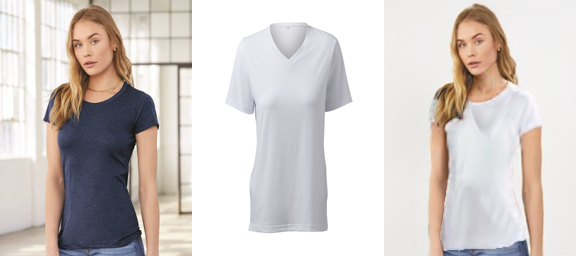

In [26]:
output_grid = np.concatenate([np.array(Image.open('ACGPN/Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('ACGPN/Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('/content/reslt/test/try-on/000001_0.png'))], axis=1)


image_grid = Image.fromarray(output_grid)
image_grid

In [ ]:
!ls -lia

total 1686564
5898280 drwxr-xr-x  1 root root       4096 Jun 20 05:37 .
5769087 drwxr-xr-x  1 root root       4096 Jun 20 05:22 ..
5769342 drwxr-xr-x 17 root root       4096 Jun 20 05:54 ACGPN
5769339 -rw-------  1 root root 1727000824 Jun 20 05:28 ACGPN.zip
7209081 drwxr-xr-x  3 root root       4096 Jun 20 05:37 checkpoints
6684689 drwxr-xr-x  4 root root       4096 Jun 15 13:41 .config
      1 drwx------  6 root root       4096 Jun 20 05:27 drive
7209089 drwxr-xr-x  2 root root       4096 Jun 20 05:31 sample
5898281 drwxr-xr-x  1 root root       4096 Jun 15 13:42 sample_data


In [28]:
!zip -r 'ACGPN-v5.zip' 'ACGPN'

  adding: ACGPN/ (stored 0%)
  adding: ACGPN/results/ (stored 0%)
  adding: ACGPN/sample/ (stored 0%)
  adding: ACGPN/README.md (deflated 53%)
  adding: ACGPN/u2net/ (stored 0%)
  adding: ACGPN/u2net/README.md (deflated 60%)
  adding: ACGPN/u2net/model/ (stored 0%)
  adding: ACGPN/u2net/model/u2net_refactor.py (deflated 75%)
  adding: ACGPN/u2net/model/u2net.py (deflated 89%)
  adding: ACGPN/u2net/model/__init__.py (deflated 37%)
  adding: ACGPN/u2net/saved_models/ (stored 0%)
  adding: ACGPN/u2net/saved_models/u2net/ (stored 0%)
  adding: ACGPN/u2net/saved_models/u2net/u2net.pth (deflated 7%)
  adding: ACGPN/u2net/saved_models/u2netp/ (stored 0%)
  adding: ACGPN/u2net/saved_models/u2netp/u2netp.pth (deflated 9%)
  adding: ACGPN/u2net/saved_models/face_detection_cv2/ (stored 0%)
  adding: ACGPN/u2net/saved_models/face_detection_cv2/haarcascade_frontalface_default.xml (deflated 85%)
  adding: ACGPN/u2net/u2net_train.py (deflated 66%)
  adding: ACGPN/u2net/clipping_camera.jpg (deflated 2

In [29]:
!ls -lia

total 1686568
4588378 drwxr-xr-x  1 root root       4096 Jun 22 06:48 .
4739473 drwxr-xr-x  1 root root       4096 Jun 22 06:07 ..
5243029 drwxr-xr-x 16 root root       4096 Jun 22 06:46 ACGPN
5242882 -rw-r--r--  1 root root 1727000833 Jun 22 06:48 ACGPN-v5.zip
4849717 drwxr-xr-x  4 root root       4096 Jun 15 13:41 .config
      1 drwx------  6 root root       4096 Jun 22 06:34 drive
5375203 drwxr-xr-x  2 root root       4096 Jun 22 06:46 .ipynb_checkpoints
5375205 drwxr-xr-x  3 root root       4096 Jun 22 06:42 reslt
5375190 drwxr-xr-x  2 root root       4096 Jun 22 06:42 sample
4588379 drwxr-xr-x  1 root root       4096 Jun 15 13:42 sample_data


In [30]:
!cp  'ACGPN-v5.zip'  '/content/drive/MyDrive/ACGPN-v5.zip'

fatal: not a git repository (or any of the parent directories): .git
